<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Hyperbolic Equations - Part II

## Characteristic Tracing

The common way to solve hyperbolic PDEs analytically is by using the method of characteristics but up until now we really have not tried to use this theory to construct a numerical method.  

Thinking about the value of the solution at a point $(x_j, t + \Delta t)$ we know for $a > 0$ that we look backwards to the point $(x_j - a \Delta t, t)$ where the solution there informs the solution at the point of interest.

This works great until we start thinking about a discretized grid where we only know the solution at time $t$ at a discrete set of points.  

![Characteristic Tracing nu != 1](./images/characteristic_tracing_1.png)

If the characteristics that intersects with $(x_j, t + \Delta t)$ also intersects with a point at time $t$ then we are ok.  Usually this will not be the case unless we specifically choose $\Delta x$ and $\Delta t$ such that this is true.  It turns out of course that this happens if
$$
    \frac{a \Delta t}{\Delta x} = 1,
$$
exactly the upper bound of our stability results.  

![Characteristic Tracing nu == 1](./images/characteristic_tracing_2.png)

Similarly if $\nu < 1$ then we know that the characteristic will not hit the grid points exactly.  Note also that due to the constraint that $|\nu| \leq 1$ that we know that the characteristic cannot pass $x_{j-1}$.

We could also instead interpolate between the two values that the characteristic splits and find the value in question.  Show that doing this using linear interpolation leads to the upwind method.

For the linear interpolation we know that the intersection is at $x_p = x_j - a \Delta t$.  The linear interpolant is
$$\begin{aligned}
    P_1(x) &= \frac{x - x_{j-1}}{x_{j} - x_{j-1}} U^n_{j} + \frac{x - x_j}{x_{j-1} - x_j} U^n_{j-1} \\
    & = \frac{x - x_{j-1}}{\Delta x} U^n_{j} - \frac{x - x_j}{\Delta x} U^n_{j-1}
\end{aligned}$$
so that the value is
$$\begin{aligned}
    U^{n+1}_j = P_1(x_j - a \Delta t) &= \frac{x_j - a \Delta t - x_{j-1}}{\Delta x} U^n_{j} - \frac{x_j - a \Delta t - x_j}{\Delta x} U^n_{j-1} \\
    &= \frac{\Delta x - a \Delta t}{\Delta x} U^n_{j} + \frac{a \Delta t}{\Delta x} U^n_{j-1} \\
    &= U^n_{j} - \frac{a \Delta t}{\Delta x} (U^n_{j} - U^n_{j-1}).
\end{aligned}$$

Using a similar technique we can also find the Beam-Warming method with quadratic interpolation:
$$\begin{aligned}
    P_2(x) &= \frac{(x - x_{j-1})(x - x_{j-2})}{(x_{j} - x_{j-1}) (x_{j} - x_{j-2})} U^n_{j} + \frac{(x - x_{j})(x - x_{j-2})}{(x_{j-1} - x_{j}) (x_{j-1} - x_{j-2})} U^n_{j-1} + \frac{(x - x_{j})(x - x_{j-1})}{(x_{j-2} - x_{j}) (x_{j-2} - x_{j-1})} U^n_{j-2} \\
    &=\frac{(x - x_{j-1})(x - x_{j-2})}{2 \Delta x^2} U^n_{j} - \frac{(x - x_{j})(x - x_{j-2})}{\Delta x^2} U^n_{j-1} + \frac{(x - x_{j})(x - x_{j-1})}{2 \Delta x^2} U^n_{j-2} \\
    &=\frac{1}{\Delta x^2} \left[\frac{1}{2} U^n_{j} (x - x_{j-1})(x - x_{j-2}) - U^n_{j-1} (x - x_{j})(x - x_{j-2}) + \frac{1}{2} U^n_{j-2} (x - x_{j})(x - x_{j-1}) \right ]
\end{aligned}$$
and finally
$$\begin{aligned}
    U^{n+1}_j = P_2(x_j - a \Delta t) &= \frac{1}{\Delta x^2} \left[\frac{1}{2} U^n_{j} (\Delta x - a \Delta t)(2 \Delta x - a \Delta t) - U^n_{j-1} (- a \Delta t)(2 \Delta x - a \Delta t) + \frac{1}{2} U^n_{j-2} (- a \Delta t)(\Delta x - a \Delta t) \right ]
\end{aligned}$$

## The Courant-Friedrichs-Lewy (CFL) condition

One interesting result of our characteristic analysis was that the stability criteria caused the characteristic intersection with $t_n$ to be within the interval $[x_{j-1}, x_j]$ when $a > 0$.  This is indicative of a more general principle for stability for numerics for PDEs, due to Courant, Friedrichs, and Lewy and often called the CFL condition.

The stability condition that we have been observing time and time again
$$
    \nu = \left | \frac{a \Delta t}{\Delta x} \right | \leq 1
$$
turns out to be a necessary condition for methods developed to solve the advection equation.  The value $\nu$ is often called the *Courant number* due to this.

### Domain of Dependence

To make the more general statement about the CFL condition and the Courant number we need to talk about what the *domain of dependence* is for a given PDE.  We already know what this is for the advection equation.  We know the solution at $(X, T)$ is $u(X, T) = u_0(X - a T)$.  The domain of dependence then is
$$
    \mathcal{D}(X,T) = \{X - a T\}.
$$
Another way to think about this is to consider what points could we change that would effect the solution at $(X,T)$.  In the case of the advection equation it is one point.

More generally for other PDEs we might expect the domain of dependence to be larger than a single point but rather a set of points (as is the case for systems of advection equations) or an entire interval.  The heat equation is one such equation and has domain of dependence $\mathcal{D}(X, T) = (-\infty, \infty)$.  In other words all points in the domain effect all other points at any future time.  This type of equation is also said to have infinite *propagation speed* and is the case for any parabolic PDE and is another way to classify more complex PDEs.

One could possibly reject this idea for the heat equation after all the Green's function for a particular point decays exponentially fast away from a point but this is still not fast enough.  This is also the source of the conclusion and physical break down of the diffusion model, material (or heat) will travel infinitely fast.

### Numerical Domain of Dependence

A numerical method also has a domain of dependence determined by the stencil used.  For instance the Lax-Friedrichs method has the solution $U^n_j$ dependent on the points $U^{n-1}_{j+1}$, $U^{n-1}_{j}$, and $U^{n-1}_{j-1}$.  This is generally true for the three-point methods we developed earlier including the Lax-Wendroff method.  

We can also trace backwards further in time to see which points $U^{n-1}_{j+1}$, $U^{n-1}_{j}$, and $U^{n-1}_{j-1}$ depend on to see a growing cone of dependence.

![Domain of Dependence](./images/characteristic_tracing_3.png)

As the grid is refined in both time and space respecting the stability criteria (the CFL condition) we then might expect that the numerical domain of dependence might converge to the true one.  This is actually not true for the three-point stencils but in fact a weaker condition does hold, that the numerical domain of dependence should contain the PDE's domain of dependence.

If we say continue to refine our grid with the ratio between $\Delta t / \Delta x = r$ then the domain of dependence for the point $(X,T)$ will fill in the interval $[X - T/ r, X+ T/r]$.  Since we want the computed solution $U(X,T)$ to converge to the true solution $u_0(X - a T)$ we need to require
$$
    X - T/r \leq X - a T \leq X + T /r.
$$
This basically implies that $u_0(X - aT)$ lies in the numerical cone of dependence.  This also implies that $|a| \leq 1 /r$ and therefore $|a \Delta t / \Delta x| \leq 1$ again giving us the familiar stability criteria.  This then leads us to the general statement of the CFL condition.

The CFL condition can then be summed up in the following statement:
> A numerical method is convergent $\Leftrightarrow$ its numerical domain of dependence contains the domain of dependence determined from the original PDE as $\Delta t \rightarrow 0$ and $\Delta x \rightarrow 0$.

### Example - Upwind Methods

Numerical domain depends on the sign of $a$ but has a 2 point stencil.  Note that if we pick the wrong direction for the upwinding that as $\Delta t$ and $\Delta x$ go to 0 the point $X - a T$ will never lie in the cone of dependence.

### Example - Heat Equation

We have mentioned already that the true domain of dependence for the heat equation is the entire domain.  How does that work for the heat equation then, especially with an implicit method?

This would imply that any 3-point stencil (which was what we had been using) in fact violates the CFL condition.  This is indeed true if we fix the ratio of $\Delta t / \Delta x$ but in fact we had a stricter requirement for the relationship, that $\Delta t / \Delta x^2 \leq 1 / 2$.  This expands the domain of dependence as $\Delta t \rightarrow 0$ fast enough that it will cover the entire domain.

For implicit methods, such as Crank-Nicholson, the CFL condition is satisfied for any time step $\Delta t$ due to the coupling of every point to every other point.

## Modified Equations

Another powerful tool for analyzing numerical methods is the use of modified equations.  This approach is similar to what we used for deriving local truncation error and reveals more about how we might expect a given numerical method to perform and what the error might appear as.

The basic idea is to find a new PDE that may be solved **exactly** by the numerical method.  In other words if we had a PDE $v_t = f(v, v_x, v_{xx}, \cdots)$ then our approximate solution given some $\Delta t$ and $\Delta x$ would satisfy $U^n_j = v(x_j, t_n)$.  The question can also be posed "is there a PDE that $U^n_j$ better captures?".  We can answer this question via Taylor series expansions.

### Example - Upwind Method

The upwind method is
$$
    U^{n+1}_j = U^n_j - \frac{a \Delta t}{\Delta x} (U^n_j - U^n_{j-1}).
$$
assuming $a > 0$.  Assume that we have a function $v(x,t)$ and an associated PDE (which we do not know yet) that the upwind method solves exactly.

First replace the discrete solution $U$ with the continuous function $v(x,t)$ so that we have
$$
    v(x, t + \Delta t) = v(x,t) - \frac{a \Delta t}{\Delta x} (v(x,t) - v(x-\Delta x,t)).
$$

Using Taylor series we know
$$\begin{aligned}
    \left(v + v_t \Delta t + \frac{\Delta t^2}{2} v_{tt} + \frac{\Delta t^3}{6} v_{ttt} + \cdots \right ) - v + \frac{a \Delta t}{\Delta x} \left( v - v + \Delta x v_x + \frac{\Delta x^2}{2} v_{xx} - \frac{\Delta x^3}{6} v_{xxx} + \cdots \right ) = 0\\    
    v_t + \frac{\Delta t}{2} v_{tt} + \frac{\Delta t^2}{6} v_{ttt} + \cdots + a \left( v_x + \frac{\Delta x}{2} v_{xx} - \frac{\Delta x^2}{6} v_{xxx} + \cdots \right ) = 0.
\end{aligned}$$
Reorganizing the terms the equation we have
$$
    v_t + a v_x = \frac{1}{2}(a \Delta x v_{xx} - \Delta t v_{tt}) + \frac{1}{6} (a \Delta x^2 v_{xxx} - \Delta t^2 v_{ttt}) + \cdots
$$

This is the PDE that $v$ satisfies.  We can see here that if $\Delta t$ and $\Delta x$ go to zero we can expect that we will recover the original equation the method was meant to solve.  The dominant terms on the right hand side though give us a glimpse of the behavior of the solution $v$ if $\Delta t$ and $\Delta x$ are non-zero.  For instance if we consider the $\mathcal{O}(\Delta x, \Delta t)$ terms we have the equation
$$
    v_t + a v_x = \frac{1}{2}(a \Delta x v_{xx} - \Delta t v_{tt}),
$$
an equation that also includes something that looks like the second order wave equation.  We can write this even more explicitly by differentiating both sides with respect to $t$
$$
    v_{tt} = -a v_{xt} + \frac{1}{2} (a \Delta x v_{xxt} - \Delta t v_{ttt})
$$
and with respect  to $x$
$$
    v_{tx} = -a v_{xx} + \frac{1}{2} (a \Delta x v_{xxx} - \Delta t v_{ttx})
$$
which combined leads to
$$
    v_{tt} = a^2 v_{xx} + \mathcal{O}(\Delta t).
$$

Inserting this back into the original expression on the right hand side we can get rid of the second order derivative in time to find
$$
    v_t + a v_x = \frac{1}{2} a \Delta x \left(1 - \frac{a \Delta t}{\Delta x} \right) v_{xx} + \mathcal{O}(\Delta x^2, \Delta t^2)
$$
which is an advection-diffusion equation similar to what we saw before except now explicitly formulated in the continuous case.  We can also say then that the upwind discretization gives a solution to the above advection-diffusion equation to second-order accuracy.

So what can we take away from this?  
 - This leading order behavior leads us to believe that the error will be diffusive in nature.
 - If $a \Delta t  = \Delta x$, i.e. the Courant number $\nu = 1$, then the exact solution will be recovered.
 - The coefficient in front of the diffusion operator is $\frac{1}{2} (a \Delta x - a^2 \Delta t)$ which is positive if $0 < a \Delta t / \Delta x < 1$, another way to see the stability criteria.
 

### Example - Lax-Wendroff

Following the same procedure (along much longer) we can derive the leading order terms (up to $\mathcal{O}(\Delta t^2, \Delta x^2)$) for the Lax-Wendroff method as
$$
    v_t + a v_x = -\frac{1}{6} a \Delta x^2 \left( 1 - \left(\frac{a \Delta t}{\Delta x}\right)^2 \right) v_{xxx}.
$$
We can observe a few things from this modified equation
 - The Lax-Wendroff approximates an advection-dispersion equation to third order.
 - The dominant error will be dispersive (the third derivative does this) although this error will be smaller than the diffusive error from the up-wind method above.

#### An Aside - Dispersion

Consider the PDE
$$
    u_t = u_{xxx}
$$
as a Cauchy problem.  If we Fourier transform the equation we arrive at the ODE
$$
    \hat{u}_t(\xi,t) = - i \xi^3 \hat{u}(\xi, t)
$$
which has the solution
$$
    \hat{u}(\xi, t) = \hat{u}_0(\xi) e^{-i \xi^3 t}.
$$

Note that this looks like the general solution to an advection problem in that waves will maintain their amplitude, however each Fourier mode now propagates at its own speed dependent on its wave number.  We can see this by taking the inverse Fourier transform to find
$$
    u(x,t) = \frac{1}{\sqrt{2 \pi}} \int^\infty_{-\infty} \hat{u}_0(\xi) e^{i\xi(x - \xi^2 t)} d\xi.
$$

Examining the integrand we can see that the $\xi$ wave number travels at the speed $\xi^2$.  In contrast the similar path with the advection equation leads to
$$
    u(x,t) = \frac{1}{\sqrt{2 \pi}} \int^\infty_{-\infty} \hat{u}_0(\xi) e^{i\xi(x - a t)} d\xi
$$
where we clearly see all wave numbers $\xi$ traveling at the speed $a$.  This is the essential difference between advection and dispersion, the components of the solution spread out due to their different effective speeds.

We can extend this to more general equations of the form
$$
    u_t + a u_x + b u_{xxx} = 0
$$
we can write the solution
$$
    u(x,t) = \frac{1}{\sqrt{2 \pi}} \int^\infty_{-\infty} \hat{u}_0(\xi) e^{i \xi (x - (a - b\xi^2) t)} d\xi.
$$
Here we see the speed of the components travel at $a - b \xi^2$ so depending on the relative sizes of $a$ and $b$ will determine which effect will be more dominant.

Back to the Lax-Wendroff method's modified equations we can write down the group velocity as
$$
    c_g = a - \frac{1}{2} a \Delta x^2 \left(1 - \left( \frac{a \Delta t}{\Delta x} \right )^2 \right) \xi^2.
$$
For this particular method $c_g < a$ for all $\xi$ and hence the dispersion error trails the waves as we saw in the numerical example.

We can also retain more terms in the modified equation, if we did this to fourth order we would find
$$
    v_t + a v_x + \frac{1}{6} a \Delta x^2 \left(1 - \left( \frac{a \Delta t}{\Delta x} \right )^2 \right) v_{xxx} + \epsilon v_{xxxx} = 0
$$
where $\epsilon = \mathcal{O}(\Delta x^3 + \Delta t^3)$.  We now see that past the dispersive error we will find hyper-diffusion as the leading error.

Dispersion and talking about wave numbers $\xi$ also brings up another important consideration.  If we were interested in highly oscillatory waves relative to the grid, i.e. when $\xi \Delta x \gg 0$, we may run into problems representing them on a given grid.  For $\xi \Delta x$ sufficiently small this is not a problem and the modified equation gives a reasonable estimate as to the dispersion and therefore the group velocity.  If our expected solution contains waves with $\xi \Delta x \gg 0$ then higher order terms may be needed to correctly represent the solution.  Usually we therefore rely on plugging in the ansatz 
$$
    u(x,t) = e^{i(\xi x_j - \omega(\xi) t_n)}.
$$
This clearly has a relation to von Neumann analysis where we have replaced $g(\xi)$ with $e^{-i \omega(\xi) \Delta t}$.

### Example:  Beam-Warming

As a contrast to the Lax-Wendroff error behavior consider the modified equation for the Beam-Warming method which is
$$
    v_t + a v_x = \frac{1}{6} a \Delta x^2 \left ( 2- \frac{3 a \Delta t}{\Delta x} + \left(\frac{a \Delta t}{\Delta x} \right)^2 \right ) v_{xxx}.
$$
We saw with the numerical example that the dispersion error proceeded the wave and we now can see why as in this case $c_g > a$.

### Example:  Leapfrog

The modified equation for leapfrog leads to some interesting conclusions as we have some fortunate cancellations.  Writing the leapfrog method as
$$
    \frac{v(x, t + \Delta t) - v(x, t - \Delta t)}{2 \Delta t} + a \frac{v(x + \Delta x, t) - v(x - \Delta x, t)}{2 \Delta x} = 0
$$
and observe that the modified equations take the form
$$
    v_t + a v_x + \frac{1}{6} a \Delta x^2 \left(1 - \left( \frac{a \Delta t}{\Delta x} \right )^2 \right) v_{xxx} = \epsilon_1 v_{xxxxx} + \epsilon_2 v_{xxxxxxx} + \cdots.
$$

It turns out that all even order derivative terms drop out leaving us only with dispersive error.  In fact the up to fourth order the leapfrog discretization solves and advection-dispersion equation.  We can also see now again why leapfrog should be called non-dissipative as there are no error terms that have even derivatives, i.e. diffusion is not present.

As a further exercise we can also compute the exact dispersion relation of the numerical method (the dispersion relation relates the wave number $\xi$ to the phase speed, usually denoted $\omega(\xi)$).  Plugging in the familiar ansatz similar to von Neumann analysis $e^{i(\xi x_j - \omega t_n)}$ we have
$$
    e^{-i\omega \Delta t} = e^{i \omega k} - \frac{a \Delta t}{\Delta x} \left( e^{i \xi \Delta x} - e^{-i\xi \Delta x}\right)
$$
leading to
$$
    \sin(\omega k) = \frac{a \Delta t}{\Delta x} \sin(\xi \Delta x).
$$

We can also compute the group velocity $c_g$ from this since
$$
    c_g = \frac{\text{d} \omega}{\text{d} \xi} = \frac{a \cos(\xi \Delta x)}{\cos(\omega \Delta t)} = \pm \frac{a \cos(\xi \Delta x)}{\sqrt{1 - \nu^2 \sin^2(\xi \Delta x)}}.
$$
Note again what happens if $\nu = 1$.

## Systems of Hyperbolic Equations

We can extend what we have done so far to systems of (linear) hyperbolic PDEs of the form
$$
    u_t + A u_x = 0
$$
with an appropriate initial condition $u(x,0) = u_0(x)$.  Here $A \in \mathbb R^{s \times s}$ where $s$ is the number of equations.  

In this case there is a well-defined way to extend our previous idea of hyperbolic PDEs as we require $A$ to be diagonalizable with real eigenvalues for the system of PDEs to be called hyperbolic. The consequence of this is that we can write $A$ as
$$
    A = R \Lambda R^{-1}
$$
were $R$ are the eigenvectors with $\Lambda$ containing the eigenvalues on its diagonal.  These eigenvalues fill in for the value we saw before as the advective speed $a$ so these being real and finite matches well with our previous idea of what a hyperbolic equation should have, information propagates at a finite speed.

Although less trivial we can still solve linear hyperbolic systems due to the decomposition of $A$.  Plugging in the decomposition and multiplying by $R^{-1}$ on the right leads to
$$
    u_t + R \Lambda R^{-1} u_x = 0 \Rightarrow \\
    R^{-1} u_t + \Lambda R^{-1} u_x = 0.
$$

Defining the *characteristic variables* as $w = R^{-1} u$ we can rewrite the system as a set of decoupled equations with
$$
    w_t + \Lambda w_x = 0.
$$
We know how to solve these as $w_p(x,t) = w_p(x - \lambda_p t, 0)$.  The initial conditions in the characteristic variables is
$$
    w(x, 0) = R^{-1} u_0(x).
$$

Transforming back to the original variables we in principle need only to evaluate
$$
    u(x,t) = R w(x,t)
$$
however this is not so easy due to the form of the solution in $w$.  Instead we can write the solution as
$$
    u(x,t) = \sum^s_{p=1} w_p(x,t) r_p = \sum^s_{p=1}w_p(x - \lambda_p t, 0) r_p.
$$

We now have *characteristics of the $p$th family* which refer to the $p$th group of characteristics determined by the $p$th eigenvalue.

### Numerical Methods

We can extend most of the methods we have discussed thus far to systems by simply replacing the advective speed $a$ with the matrix $A$.  For example the Lax-Wendroff method can be generalized to
$$
     U^{n+1}_j = U^n_j - \frac{\Delta t}{2 \Delta x} A (U^n_{j+1} - U^n_{j-1})  + \frac{ \Delta t^2}{2 \Delta x^2} A^2 (U^n_{j+1} - 2 U^n_{j} + U^n_{j-1})
$$
provided that the Courant number $\nu < 1$.  Note now we need to be careful about the Courant number as in general the CFL condition requires that 
$$
    \nu = \max_{1 \leq p \leq s} \left| \frac{\lambda_p \Delta t}{\Delta x} \right | < 1
$$
All of the centered-based approximations are generally applicable with this stability criteria.

The methods we have considered that were one-sided however require a bit more care unless all the eigenvalues of the matrix $A$ are either positive or negative.  Instead we must decompose the system into its characteristic variables, apply the method per equation, and re-transform back and generally classified as *Godunov's method*.

## Boundaries

So we have mostly ignored boundaries.  Turns out boundaries are pretty important and we should probably not ignore them.  Let's now consider how to incorporate boundaries to find the methods to solve initial boundary value problems.

Consider now the hyperbolic PDE defined as
$$
    u_t + a u_x = 0 ~~~~ \Omega = [0, 1] \\
    u(x, 0) = u_0(x)
$$
before defining boundary conditions.  Due to our domain of dependence discussion we know a bit about when the boundaries will impact our solution.

![Characteristic boundaries](./images/characteristics_regions_1.png)

For the scalar equation and $a > 0$ then we know
$$
    u(x,t) = \left \{ \begin{aligned}
        u_0(x - a t) & & 0 \leq x - at \leq 1 \\
        g_0(t - x / a) & & \text{otherwise}.
    \end{aligned} \right .
$$

If we have a system of equations with opposite signs for the speeds we might have a situation that looked like the following instead
![System of hyperbolic PDEs with boundaries](./images/characteristics_regions_2.png)

### Upwind for IBVP

Say we use the appropriate upwind method for $a > 0$ with the grid $\Delta x = 1 / (m + 1)$.  Upwind describes all the internal equations with the condition on the left boundary providing the $U_0$ value, hence the method completely specifies the problem.  The method is stable with the same condition as before.

Note that we can no longer directly use von Neumann analysis due to the new boundary.  It still can be useful as a stability tool however the method of lines analysis can be more useful here.

Consider again the system of ODEs
$$
    U'(t) = A U(t) + g(t)
$$
where
$$
    A = - \frac{a}{\Delta x} \begin{bmatrix}
        1 \\
        -1 & 1 \\
        & -1 & 1 \\
        & & \ddots & \ddots \\
        & & & -1 & 1
    \end{bmatrix} ~~~~ g(t) = \begin{bmatrix} g_0(t) \frac{a}{\Delta x} \\ 0 \\ \vdots \\ 0 \end{bmatrix}.
$$

Unfortunately this new matrix, although similar to the one considered before, has very different properties.  It turns out that the matrix has eigenvalues uniformly distributed around the circle with radius $a / \Delta x$ and centered at $z = - a / \Delta x$.

Why are these changes significant?  If we follow our previous analysis we would conclude that the method is stable if
$$
    0 \leq a \frac{\Delta t}{\Delta x} \leq 2
$$
which is a bit suspicious.  It turns out that this is a necessary condition (although clearly not sufficient).  The problem in our analysis stems from the fact that $A$ is highly non-normal and we require further constraints on the $\epsilon$-pseudospectra which again leads to our more familiar stability constraint.

### Outflow Boundaries

As was mentioned before, often times a numerical method we would like to use would require the use of boundary conditions where none should exist.  We saw this with the Lax-Wendroff method where the outflow boundary points are needed by the stencil.  We can specify a *numerical boundary condition* or *artificial boundary condition* instead of using a one-sided approximation.  The prescription of numerical boundary conditions is long and the analysis tricky so here we will relegate ourselves to a couple of illustrative examples

#### Example

Consider the leapfrog method on a finite domain with $a > 0$ and a given inflow boundary condition $g_0(t)$.  Say we use the upwind method on the outflow boundary instead of prescribing a condition.  It turns out doing so will introduce a waves with $\xi \Delta x \approx \pi$ will move to the left with speed $-a$.

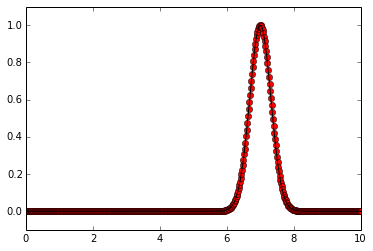

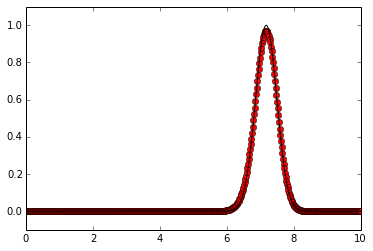

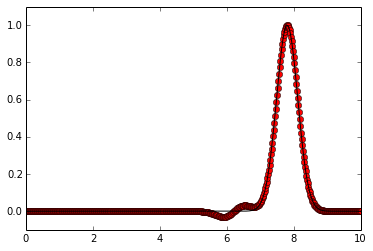

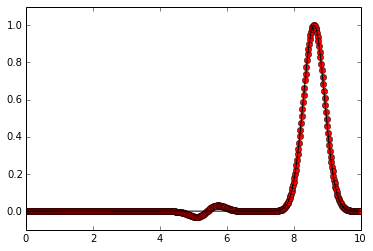

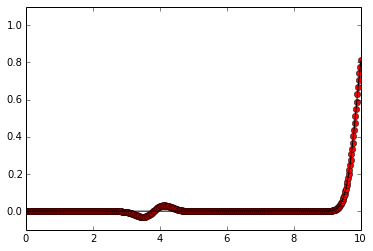

In [2]:
# Implement Leapfrog for the PDE u_t + u_x = 0 on a finite domain [0, 10]
# domain
u_true = lambda x, t: numpy.exp(-5.0 * ((x - t - 7.0)**2))

m = 500
x = numpy.linspace(0, 10.0, m)
delta_x = 10.0 / (m - 1)
cfl = 0.8
delta_t = cfl * delta_x

U = u_true(x, 0)
t = 0.0
# Jump start with true-solution
U_new = u_true(x, t + delta_t)
U_old = U_new.copy()
# Plot solution at t = 17.0 and t = 0.0
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U, 'ro')
axes.plot(x, u_true(x, t),'k')
# axes.set_xlim((15.0, 25.0))
axes.set_ylim((-0.1, 1.1))
t += delta_t
for t_final in (10*delta_t, 50 * delta_t, 100 * delta_t, 200 * delta_t):
    while t < t_final:
        U_new[0] = U_old[0] - delta_t / delta_x * (U[1] - u_true(0.0, t))
        U_new[1:-1] = U_old[1:-1] - delta_t / delta_x * (U[2:] - U[:-2])
        # Use upwind for outflow boundary
        U_new[-1] = U[-1] - delta_t / delta_x * (U[-1] - U[-2])
        U_old = U.copy()
        U = U_new.copy()
        t += delta_t

    # Plot solution at t = 17.0 and t = 0.0
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(x, U, 'ro')
    axes.plot(x, u_true(x, t),'k')
    # axes.set_xlim((15.0, 25.0))
    axes.set_ylim((-0.1, 1.1))

plt.show()

In general dealing with outflow boundary conditions is very difficult.  Often we will instead of prescribing a one-sided method want to specify the numerical boundaries which have special properties, such as being non-reflective or absorbing (we see a slight reflected wave in the above example).

## Alternatives

Finally we end this discussion with a few alternatives not mentioned above.

### Higher Order Discretizations

We can of course use arbitrarily high order discretizations beyond what we talked about above by employing the method of lines and discretizing space and time
$$
    U_j'(t) = -a W_j(t)
$$
assuming the solution remains sufficiently smooth.  One example could be 
$$
    W_j(t) = \frac{4}{3} \left(\frac{U_{j+1} - U_{j-1}}{2 \Delta x} \right )- \frac{1}{3} \left(\frac{U_{j+2} - U_{j-2}}{4 \Delta x} \right ).
$$
The finite difference discretizations discussed so far can all be used but the higher-order accuracy we reach for the wider the stencil becomes and we may have trouble consistently prescribing these.  

Another approach to avoid this is to use compact differencing methods which solve linear systems.  A simple example of this idea is
$$
    \frac{1}{4} W_{j-1} + W_j + \frac{1}{4} W_{j+1} = \frac{3}{2} \left( \frac{U_{j+1} - U_{j-1}}{2 \Delta x} \right )
$$
which leads to a $\mathcal{O}(\Delta x^4)$ approximation.

### Spectral Methods

We can also use spectral methods to transform the spatial derivatives into a linear system.  In essence we can derive a dense differentiation matrix $D$ so that $W = D U$.  These can easily be generalized to more complex systems of equations but require smooth solutions to work and can be very difficult to analyze.

### Other Time Discretizations

We can of course also use different time discretizations.  Above we used what looked like forward Euler and leapfrog but you can use higher-order, explicit methods such as Runge-Kutta methods or an implicit method.  Implicit methods can be useful if you are not as concerned about accuracy but want to evolve the solution to large times.  Also, although the advection equation itself is not stiff, some hyperbolic PDEs can be or the spatial discretization can as well (as is the case with the spectral approach above).

### Conservation Laws and Finite Volume Methods

A large and important class of hyperbolic PDEs are conservation laws of the form
$$
    u_t + f(u)_x = 0.
$$

These naturally arise in many areas of physics and describe the evolution of quantities such as mass, momentum, or energy.  One such system is the Euler equations describing compressible gas dynamics:
$$\begin{aligned}
    &\rho_t + (\rho u)_x = 0 \\
    &(\rho u)_t + (\rho u^2 + p)_x = 0 \\
    &(E)_t + [(E + p) u]_x = 0
\end{aligned}$$
describing density $\rho$, momenta $\rho u$ and energy $E$ coupled with an appropriate equation of state relating pressure, density, and internal energy.

A more natural way to formulate conservation laws is with integral forms of the same equations.  In general we can write these as
$$
    \frac{\text{d}}{\text{d}t} \int^{x_2}_{x_1} u(x, t) dx = f(u(x_1,t)) - f(u(x_2, t)).
$$

Methods for solving these often evolve cell averages of $u$ rather than point values.  In this case our approximation $U^n_i$ is viewed as this average over a grid cell $[x_{i-1/2}, x_{i+1/2}]$ with length $\Delta x$ and centered at $x_i$.  The cell average would then be
$$
    U^n_i \approx \frac{1}{\Delta x} \int^{x_{i+1/2}}_{x_{i-1/2}} u(x, t_n) dx.
$$
Finite volume methods generally take this approach with the specification of a way to evaluate the flux functions the primary numerical goal.